<a href="https://colab.research.google.com/github/RMichae1/PyroStudies/blob/master/Bayesian_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-optimize

     |████████████████████████████████| 102kB 2.2MB/s 


In [26]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from skopt.plots import plot_objective, plot_histogram
from skopt.utils import use_named_args
from skopt.plots import plot_evaluations
from skopt import gp_minimize
from skopt.plots import plot_convergence

from sklearn.datasets import load_diabetes
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
diabetes_data = load_diabetes()
diabetes_df = pd.DataFrame(data=np.c_[diabetes_data['data'], diabetes_data['target']], 
                           columns=diabetes_data['feature_names'] + ['target'])
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


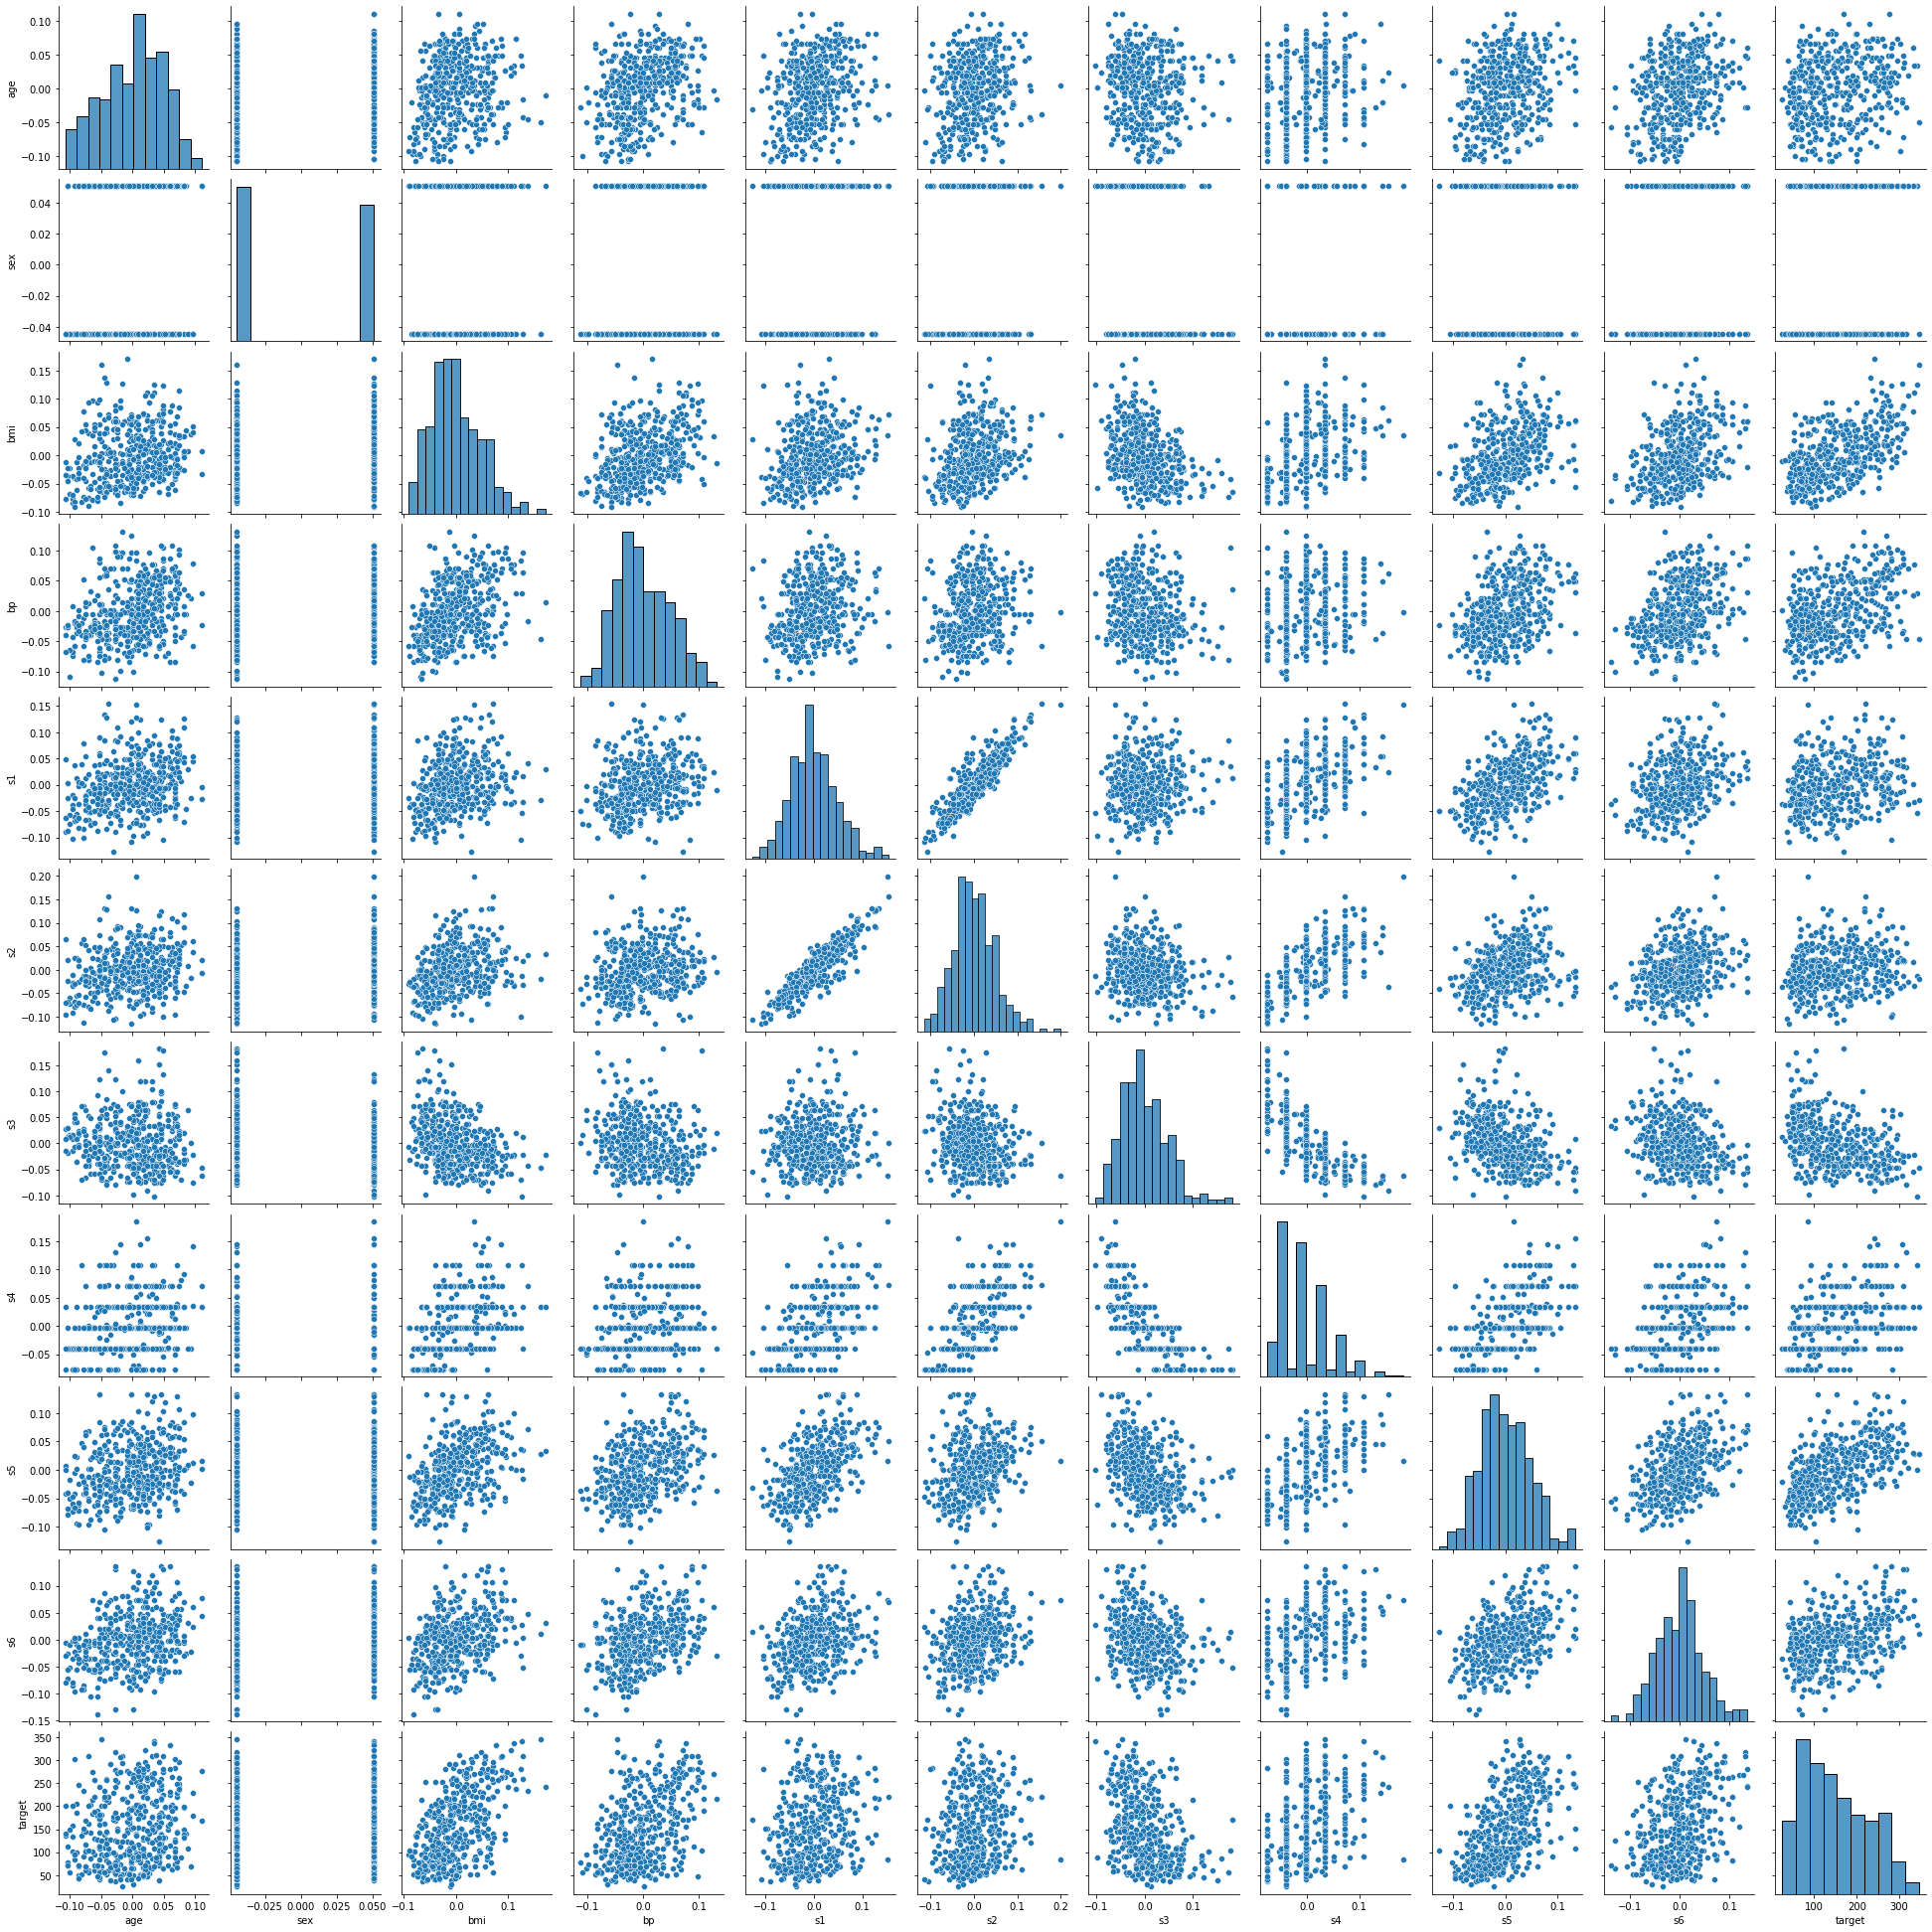

In [4]:
sns.pairplot(diabetes_df)

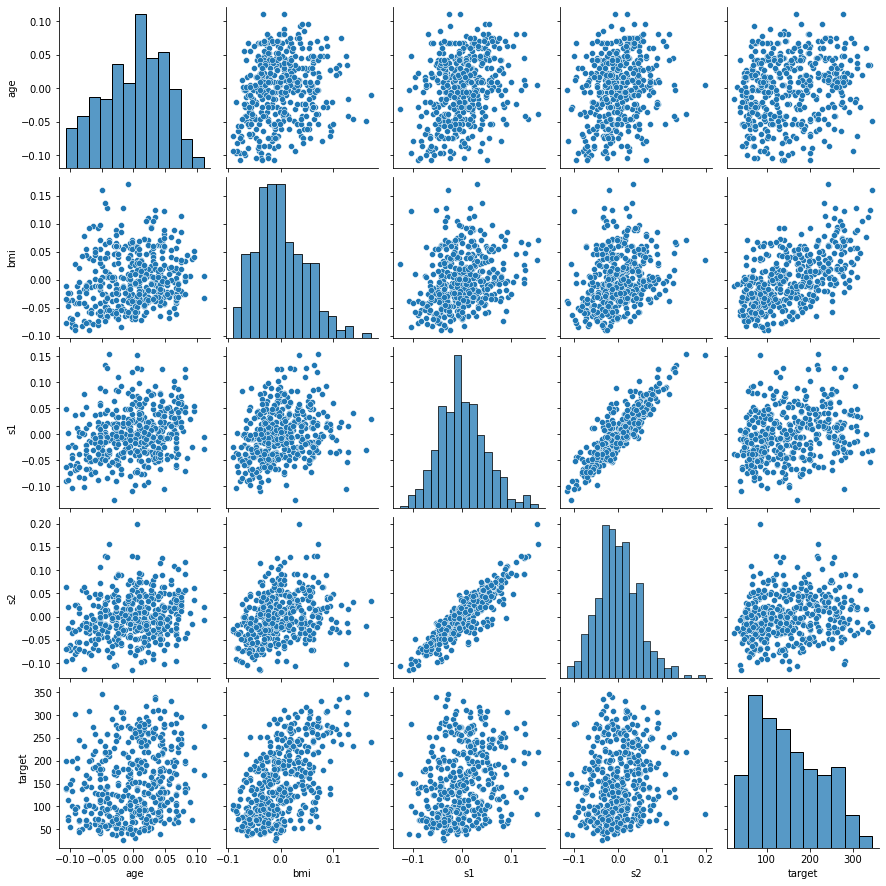

In [8]:
sns.pairplot(diabetes_df[['age', 'bmi', 's1', 's2', 'target']])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_df.drop(columns="target"), diabetes_df.target, test_size=0.2, random_state=21)

In [9]:
pipe = Pipeline([
                 ('model', GradientBoostingRegressor())
])

ada_search = {
    'model': [AdaBoostRegressor()],
    'model__learning_rate': Real(0.005, 0.9, prior="log-uniform"),
    'model__n_estimators': Integer(1, 1000),
    'model__loss': Categorical(['linear', 'square', 'exponential'])
}

gb_search = {
    'model': [GradientBoostingRegressor()],
    'model__learning_rate': Real(0.005, 0.9, prior="log-uniform"),
    'model__n_estimators': Integer(1, 1000),
    'model__loss': Categorical(['ls', 'lad', 'quantile'])
}

opt = BayesSearchCV(
    pipe,
    [(ada_search, 100), (gb_search, 100)],
    cv=5
)

opt.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=5, error_score='raise',
              estimator=Pipeline(memory=None,
                                 steps=[('model',
                                         GradientBoostingRegressor(alpha=0.9,
                                                                   ccp_alpha=0.0,
                                                                   criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.1,
                                                                   loss='ls',
                                                                   max_depth=3,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                    

In [10]:
print(f"validation score: {opt.best_score_}")
print(f"test score: {opt.score(X_test, y_test)}")
print(f"best parameters: {str(opt.best_params_)}")

validation score: 0.46989003593474976
test score: 0.34078180831257776
best parameters: OrderedDict([('model', AdaBoostRegressor(base_estimator=None, learning_rate=0.06407566831734247,
                  loss='linear', n_estimators=259, random_state=None)), ('model__learning_rate', 0.06407566831734247), ('model__loss', 'linear'), ('model__n_estimators', 259)])


In [18]:
opt.optimizer_results_[0]

          fun: -0.46989003593474976
    func_vals: array([-0.44333153, -0.4623764 , -0.46530195, -0.45976735, -0.46666024,
       -0.42982046, -0.4392249 , -0.45897955, -0.44262993, -0.46592353,
       -0.3421061 , -0.4598645 , -0.31832393, -0.43003117, -0.46379868,
       -0.27095742, -0.44588552, -0.4391562 , -0.43119069, -0.45834918,
       -0.4626222 , -0.4617783 , -0.45573728, -0.45909358, -0.43982692,
       -0.46129808, -0.4590054 , -0.4585574 , -0.45646573, -0.45152491,
       -0.46388996, -0.46095586, -0.45135833, -0.43505396, -0.45338248,
       -0.462871  , -0.43695308, -0.44817189, -0.43884435, -0.45767798,
       -0.46150634, -0.45012483, -0.44294262, -0.43190745, -0.45717279,
       -0.44142887, -0.46989004, -0.43600941, -0.45740979, -0.44783741,
       -0.43911211, -0.43935707, -0.45839232, -0.45952609, -0.45250681,
       -0.45121127, -0.44195146, -0.44664687, -0.42680458, -0.45550536,
       -0.46247431, -0.45613109, -0.43765447, -0.42820111, -0.45740648,
       -0.450

In [24]:
ada = AdaBoostRegressor(random_state=21)

# numerical space
space  = [Real(0.005, 0.9, "log-uniform", name='learning_rate'),
          Integer(1, 1000, name="n_estimators")]

# decorator to receive the parameters as keyword arguments.
@use_named_args(space)
def objective(**params):
    ada.set_params(**params)
    return -np.mean(cross_val_score(ada, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

In [25]:
ada_gp = gp_minimize(objective, space, n_calls=100, random_state=21)

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


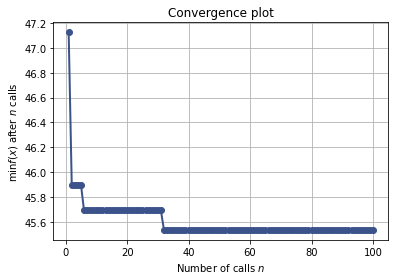

In [28]:
plot_convergence(ada_gp)

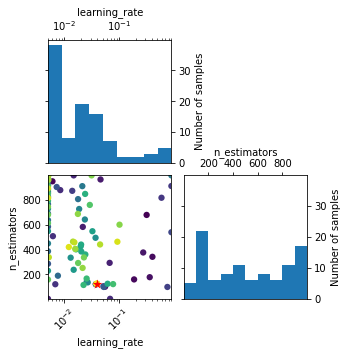

In [29]:
_ = plot_evaluations(ada_gp, bins=10)